In [1]:
import numpy as np, matplotlib
import matplotlib.pyplot as plt
import tools21cm as t2c

from tqdm import tqdm

In [2]:
def PercentContours(x, y, nr_bins=None, colour='green', style=[':', '--', '-'], perc_arr=[0.99, 0.95, 0.68], lw=3):
    if(type(nr_bins) == int):
        hist, xedges, yedges = np.histogram2d(x, y, bins=nr_bins)
    else:
        #x_edges = np.arange(np.min(x), np.max(x), 1e-3)
        #y_edges = np.arange(np.min(y), np.max(y), 1e-3)
        x_edges = np.linspace(np.min(x), np.max(x), 300)
        y_edges = np.linspace(np.min(y), np.max(y), 300)
        hist, xedges, yedges = np.histogram2d(x, y, bins=(x_edges, y_edges))

    sort_hist = np.sort(hist.flatten())[::-1]
    perc = (np.array(perc_arr)*np.sum(sort_hist)).astype(int)
    levels = np.zeros_like(perc)
    
    j = -1
    for i, val in enumerate(sort_hist):
        if(np.sum(sort_hist[:i]) >= perc[j]):
            levels[j] = val
            if(j == -len(perc)):
                break
            j -= 1 
    c = plt.contour(hist.T, extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()], levels=levels, colors=colour, linestyles=style, linewidths=lw)
    c.levels = np.array(perc_arr)*100.
    plt.clabel(c, c.levels, inline=True, inline_spacing=10, fmt='%d%%', fontsize=16)
    #plt.draw()

In [3]:
path_in = '/scratch/snx3000/mibianco/output_segunet/outputs/all24-09T23-36-45_128slice/prediction/'
path_out = path_in

In [29]:
i = 10
redshift1, mcc1, mean_true1 = np.loadtxt('%sstats_i%d.txt' %(path_in, i), unpack=True, usecols=(0, 5, 7))

In [38]:
redshift = np.zeros((redshift1.size*300))
mcc = np.zeros((mcc1.size*300))
mean_true = np.zeros((mean_true1.size*300))

for ii in tqdm(range(300)):
    redshift1, mcc1, mean_true1 = np.loadtxt('%sstats_i%d.txt' %(path_in, ii), unpack=True, usecols=(0, 5, 7))
    redshift[ii*552:(ii+1)*552] = redshift1
    mcc[ii*552:(ii+1)*552] = mcc1
    mean_true[ii*552:(ii+1)*552] = mean_true1

100%|██████████| 300/300 [00:00<00:00, 517.36it/s]


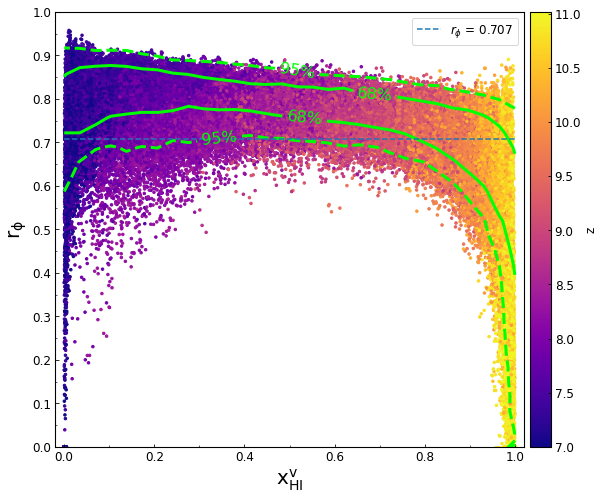

(None, None)

<Figure size 432x288 with 0 Axes>

In [63]:
fig1, ax_s = plt.subplots(figsize=(10,8), ncols=1)

plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# get redshift color
cm = matplotlib.cm.plasma
sc = ax_s.scatter(mean_true, mcc, c=redshift, vmin=redshift.min(), vmax=redshift.max(), s=25, cmap=cm, marker='.')
norm = matplotlib.colors.Normalize(vmin=7, vmax=9, clip=True)
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cm)
redshift_color = np.array([(mapper.to_rgba(v)) for v in redshift])

PercentContours(x=mean_true, y=mcc, nr_bins=30, colour='lime', style=['--', '-'], perc_arr=[0.95, 0.68])

ax_s.set_xlim(mean_true.min()-0.02, mean_true.max()+0.02), ax_s.set_xlabel(r'$\rm x^v_{HI}$', size=20)
ax_s.set_ylim(0.0, 1.0), ax_s.set_ylabel(r'$\rm r_{\phi}$', size=20)
ax_s.hlines(y=np.mean(mcc), xmin=0., xmax=1., ls='--', label=r'$r_{\phi}$ = %.3f' %(np.mean(mcc)), alpha=1., color='tab:blue', zorder=3)
plt.legend(loc=1)

ax_s.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.1))
ax_s.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
ax_s.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1))
ax_s.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.05))

fig1.colorbar(sc, ax=ax_s, pad=0.01, label=r'$\rm z$')
fig1.savefig('%smcc_dataset.png' %path_out, bbox_inches='tight', facecolor='white')
plt.show(), plt.clf()

Volume distribution

In [29]:
i = 10
path_in = '/store/ska/sk09/segunet/inputs/dataLC_128_pred_190922/'
path_out = '/scratch/snx3000/mibianco/output_segunet/outputs/all24-09T23-36-45_128slice/prediction/'

dT2 = t2c.read_cbin('%sdata/dT2_21cm_i%d.bin' %(path_in, i))
dT4pca = t2c.read_cbin('%sdata/dT4pca_21cm_i%d.bin' %(path_in, i))
pred_xH = t2c.read_cbin('%spred_dT4pca4_21cm_i%d.bin' %(path_out, i))
true_xH = t2c.read_cbin('%sdata/xH_21cm_i%d.bin' %(path_in, i))
redshift = np.loadtxt('%slc_redshifts.txt' %path_in)

idx = np.argmin(np.abs(redshift - 10.))
#idx = redshift.size-128

print(idx, redshift[idx])
subvol_pred = pred_xH[...,idx:]
subvol_true = true_xH[...,idx:]
print(subvol_pred.shape)

440 9.99608
(128, 128, 112)


In [30]:
v_res = (256./128)**3

mp_pred, sz_pred = t2c.fof(1-subvol_pred)
vs_pred, vdn_pred, dm_pred = t2c.plot_fof_sizes(v_res*sz_pred, bins=25, boxsize=256.)

mp_true, sz_true = t2c.fof(1-subvol_true)
vs_true, vdn_true, dm_true = t2c.plot_fof_sizes(v_res*sz_true, bins=25, boxsize=256.)

Program runtime: 0.000581 minutes.
The output is a tuple containing output-map and volume-list array respectively.
The output is Size, Size**2 dP/d(Size), lowest value
Program runtime: 0.000525 minutes.
The output is a tuple containing output-map and volume-list array respectively.
The output is Size, Size**2 dP/d(Size), lowest value


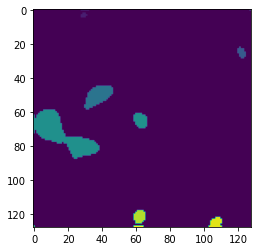

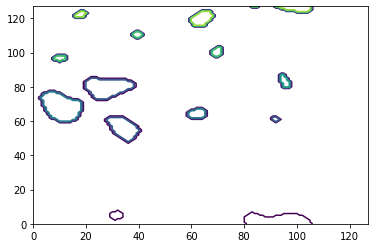

(None, None)

<Figure size 432x288 with 0 Axes>

In [31]:
plt.imshow(mp_pred[...,10])
plt.show(), plt.clf()
plt.contour(mp_true[...,10])
plt.show(), plt.clf()

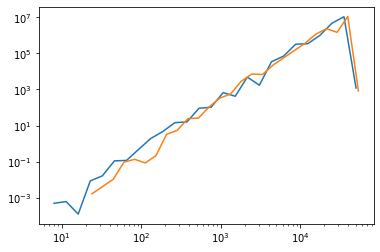

In [32]:
plt.loglog(vs_pred, vs_pred**2 * vdn_pred, color='tab:blue')
plt.loglog(vs_true, vs_true**2 * vdn_true, color='tab:orange')

Visual plot

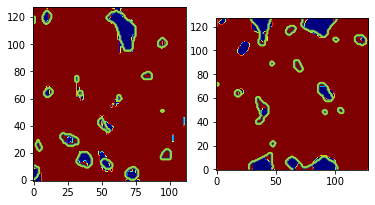

In [33]:
#plt.imshow(subvol_pred, cmap='jet')
#plt.contour(subvol_true)

fig, ax = plt.subplots(1,2)
ax[0].imshow(subvol_pred[:,64,:], cmap='jet', origin='lower')
ax[0].contour(subvol_true[:,64,:])
ax[1].imshow(subvol_pred[...,0], cmap='jet', origin='lower')
ax[1].contour(subvol_true[...,0])

In [34]:
def plot_LC(img, i_z):
    fig = plt.figure(figsize=(28, 18))
    gs = matplotlib.gridspec.GridSpec(nrows=3, ncols=2, width_ratios=[3,1], height_ratios=[1, 1, 1])
    ax0 = fig.add_subplot(gs[0,0])
    im = ax0.imshow(img[:,64,:], cmap='jet', aspect='auto', origin='lower')
    fig.colorbar(im, ax=ax0, pad=0.01, fraction=0.048)
    ax01 = fig.add_subplot(gs[0,1])
    #ax01.set_title(r'z=%.3f    $\nu_{obs}$ = %d MHz' %(redshift[i_z], t2c.z_to_nu(z)), fontsize=18)
    ax01.imshow(img[:,:,i_z], cmap='jet', origin='lower')
    fig.colorbar(im, ax=ax01, pad=0.01, fraction=0.048) #, label=r'$\delta T_b$ [mk]')
    

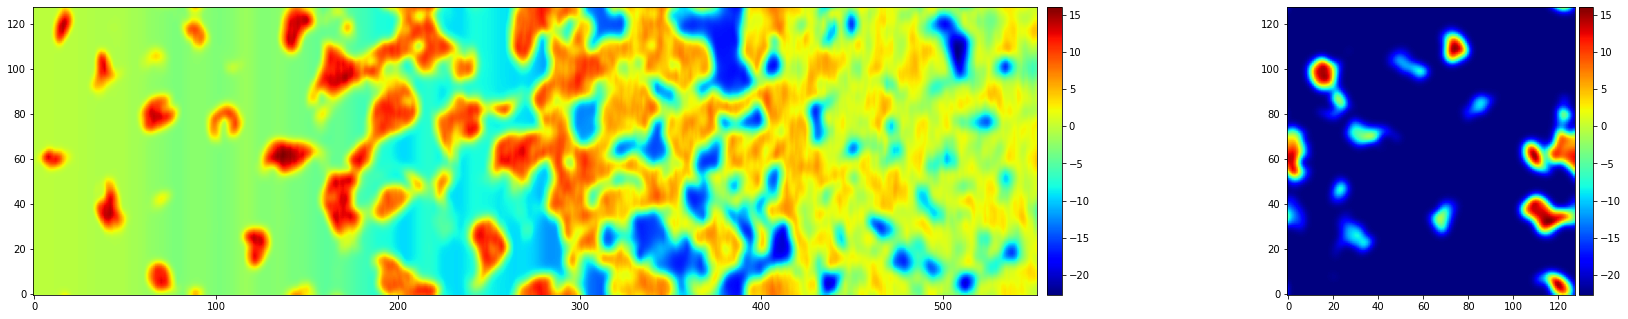

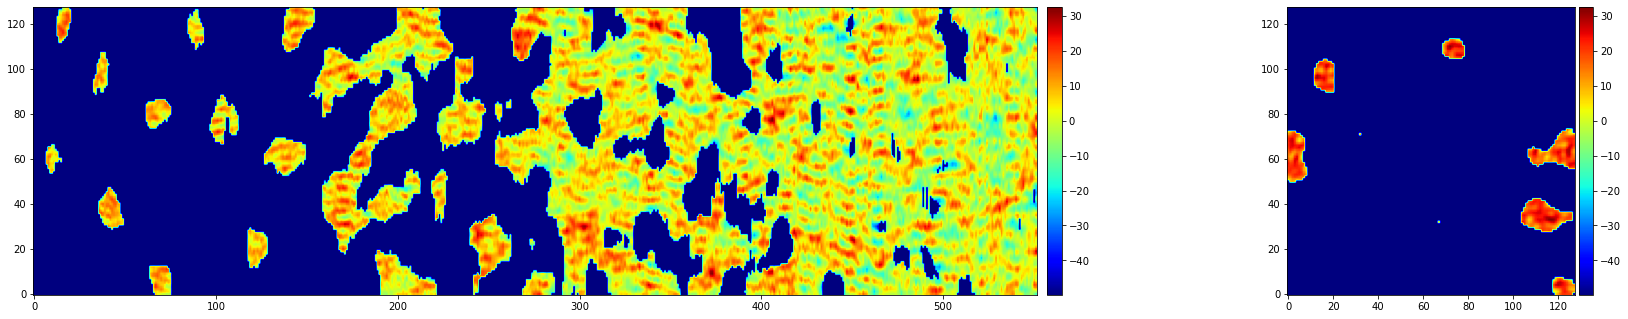

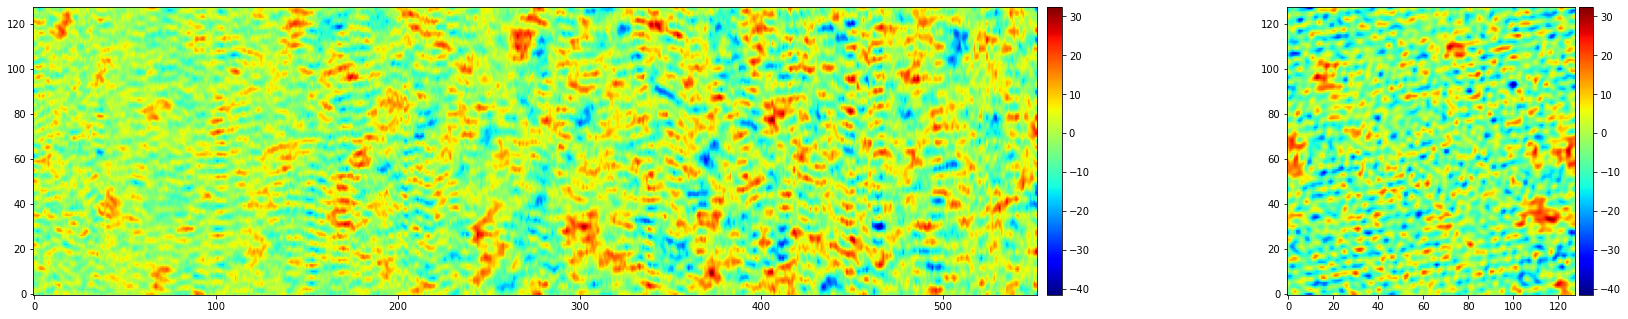

In [35]:
i_z = 50
mask = dT4pca.copy()

plot_LC(dT2, i_z)
mask[pred_xH == 0] = dT4pca.min()
plot_LC(mask, i_z)
plot_LC(dT4pca, i_z)

#plt.contour(true_xH[...,i_z])

In [36]:
ps_masked, ks_masked = t2c.power_spectrum_1d(mask[...,i_z], kbins=15, box_dims=256.)
ps_true, ks_true = t2c.power_spectrum_1d(dT2[...,i_z], kbins=15, box_dims=256.)

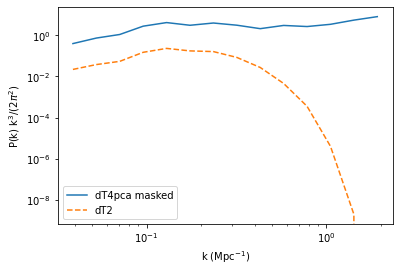

(None, None)

<Figure size 432x288 with 0 Axes>

In [37]:
plt.loglog(ks_masked, ps_masked*ks_masked**3/2/np.pi**2, label='dT4pca masked')
plt.loglog(ks_true, ps_true*ks_true**3/2/np.pi**2, linestyle='--', label='dT2')

plt.xlabel('k (Mpc$^{-1}$)')
plt.ylabel('P(k) k$^{3}$/$(2\pi^2)$')
plt.legend()

plt.show(), plt.clf()